# Regresión con Árboles de Decisión

## Importar las librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
# cargar los datos
boston = datasets.load_boston()

In [3]:
# Transformar a dataframe para visualizar
col_names = list(boston.feature_names)
col_names.append('TARGET')
df = pd.DataFrame(np.c_[boston.data, boston.target], columns=col_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  TARGET  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [4]:
print('Información en el dataset:')
print(boston.keys())
print()

Información en el dataset:
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])



In [5]:
print('Características del dataset:')
print(boston.DESCR)

Características del dataset:
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 

In [6]:
print('Nombres columnas:')
print(boston.feature_names)

Nombres columnas:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
#Seleccionamos solamente la columna 6 del dataset
X_adr = boston.data[:, np.newaxis, 5]

In [8]:
#Defino los datos correspondientes a las etiquetas
y_adr = boston.target

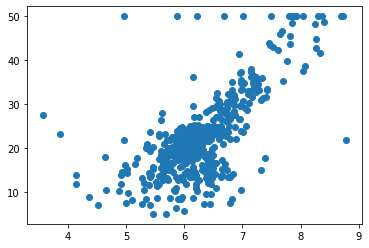

In [9]:
#Graficamos los datos correspondientes
plt.scatter(X_adr, y_adr)
plt.show()

In [10]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_adr, y_adr, test_size=0.2)

In [15]:
#Defino el algoritmo a utilizar
from sklearn.ensemble import RandomForestRegressor
adr = RandomForestRegressor(n_estimators = 500, random_state = 0)

In [16]:
#Entreno el modelo
adr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

In [17]:
#Realizo una predicción
Y_pred = adr.predict(X_test)
print(Y_pred)

[36.44060667 22.57988333 12.581      23.86       12.9728     21.38805
 25.1246     22.76836    16.8653     15.9148     21.71418333 15.3974
 23.5844     18.5876     15.80723333 17.62703333 19.02494    16.6935
 15.08653333 18.06106667 47.1854     32.48708667 21.61585    19.52401667
 20.96856667 22.2884     15.9148     18.67988    30.927      20.158
 14.9942     14.46077    36.57643333 16.997      18.39463333 23.13865381
 29.13736    26.7888     18.34446667 17.978      32.2688     14.41389524
 15.80723333 18.48       18.24768    20.21006667  9.133      16.30617952
 30.4542     32.08253333 15.7931     21.80553    36.69431    48.82966667
 20.6296     28.9594     18.34755333 31.0678     19.02494    42.3886
 32.8864     16.3088     17.43821667 20.98645    25.77106667 17.5478
 16.7113     17.431      25.67726667 16.7126     17.0016     18.4022
 21.4528     17.28800667 17.20317222 46.6234     22.9966     15.83488333
 23.32701667 24.3314     23.32597143  9.5718     20.11925349 21.37262667
 12.27

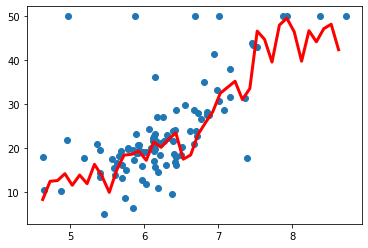

DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION

Precisión del modelo:
0.8916291730232655


In [18]:
#Graficamos los datos de prueba junto con la predicción
X_grid = np.arange(min(X_test), max(X_test), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test)
plt.plot(X_grid, adr.predict(X_grid), color='red', linewidth=3)
plt.show()
print('DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION')
print()
print('Precisión del modelo:')
print(adr.score(X_train, y_train))